<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

## 📊 Exploratory Data Analysis (EDA)

### ✅ Principales insights:

- **25.29%** de los comercios tienen presencia web.
- **Tandil** y **Olavarria** lideran en digitalización.
- **Instagram 19.2%** y **Facebook 18.11** concentran la presencia en RRSS.
- El puntaje promedio se mantiene **alto y constante (4.0 - 4.4)**.
- **Categorías más comunes:** Hay 621 categorías registradas, lo que genera que los datos no sean precisos
  - **Tienda de Ropa:** 7,92% con 464 registros
  - **Tienda de Alimentación:** 6,25% con 366 registros
  - **Comercio:** 5,68% con 333 registros
  - **Agencia Inmobiliaria:** 3,07%

</div>

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">


</div>

In [67]:
# Se importan las librerias necesarias para la manipulación y visualización de datos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configura pandas para mostrar todas las columnas del DataFrame al mostrarlo, sin recorte visual.
pd.set_option('display.max_columns', None) 

In [68]:
# Carga de datos desde archivo CSV
df = pd.read_csv('../CleanData/Regional.csv')

In [69]:
# Obtenemos número de filas y columnas del DataFrame
df.shape

(5859, 16)

In [70]:
# Obtenemos el número de elementos en el DataFrame
df.size

93744

In [71]:
# Información del DataFrame: 
# Número de filas y columnas, nombres y tipos de datos de las columnas,
# valores no nulos en cada columna, uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         5859 non-null   object 
 1   categoryName  5859 non-null   object 
 2   website       5859 non-null   object 
 3   street        5859 non-null   object 
 4   phone         5859 non-null   object 
 5   city          5859 non-null   object 
 6   state         5859 non-null   object 
 7   location/lat  5859 non-null   float64
 8   location/lng  5859 non-null   float64
 9   totalScore    5859 non-null   float64
 10  rank          5859 non-null   int64  
 11  imageUrl      5859 non-null   object 
 12  imagesCount   5859 non-null   float64
 13  reviewsCount  5859 non-null   int64  
 14  scrapedAt     5859 non-null   object 
 15  searchString  5859 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 732.5+ KB


In [72]:
# Análisis de tipos de datos para identificar variables numéricas y categóricas
df.dtypes

title            object
categoryName     object
website          object
street           object
phone            object
city             object
state            object
location/lat    float64
location/lng    float64
totalScore      float64
rank              int64
imageUrl         object
imagesCount     float64
reviewsCount      int64
scrapedAt        object
searchString     object
dtype: object

In [73]:
# Convertir fecha de scraping manteniendo formato datetime
# Esto permite análisis temporales futuros (ej: comparar con scraping en 6 meses)
df['scrapedAt'] = pd.to_datetime(
    df['scrapedAt'], 
    errors='coerce',  # Maneja fechas inválidas sin romper el código
    utc=True          # Estandariza zona horaria para comparaciones
).dt.floor('s').dt.tz_localize(None)  # Elimina timezone para visualización limpia
df['scrapedAt']

0      2025-05-19 00:03:00
1      2025-05-19 00:03:02
2      2025-05-19 00:03:02
3      2025-05-19 00:03:02
4      2025-05-19 00:03:02
               ...        
5854   2025-07-30 15:10:41
5855   2025-07-30 15:10:41
5856   2025-07-30 15:10:56
5857   2025-07-30 15:10:58
5858   2025-07-30 15:10:59
Name: scrapedAt, Length: 5859, dtype: datetime64[ns]

In [74]:
# # Visualizar las primeras 10 filas para entender la estructura
df.head(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,La Casa De Los Trofeos,Comercio,Incomplete,Rivadavia 496,Incomplete,Azul,Provincia de Buenos Aires,-36.774661,-59.862623,0.0,1,Incomplete,0.0,0,2025-05-19 00:03:00,Comercio
1,La Escoba Loca,Tienda De Artículos Para El Hogar,Incomplete,Colón Nte. 117,+54 9 2281 50-2996,Azul,Provincia de Buenos Aires,-36.767281,-59.851848,4.8,1,https://lh3.googleusercontent.com/gps-cs-s/AC9...,44.0,73,2025-05-19 00:03:02,Comercio
2,Artículos Magali,Tienda General,Incomplete,Monseñor Caneva Nte. 160,+54 9 2281 31-0611,Azul,Provincia de Buenos Aires,-36.774353,-59.841898,4.3,2,Incomplete,0.0,12,2025-05-19 00:03:02,Comercio
3,Autoservicio San Jorge,Comercio,Incomplete,Burgos Nte. 100,+54 9 2281 42-3119,Azul,Provincia de Buenos Aires,-36.768145,-59.851305,4.6,3,https://lh3.googleusercontent.com/p/AF1QipPV0V...,6.0,127,2025-05-19 00:03:02,Comercio
4,Asociacion Latina De Exportacion Sa,Comercio,Incomplete,Julio Argentino Roca 846,+54 9 2281 43-0338,Azul,Provincia de Buenos Aires,-36.785067,-59.859254,3.3,4,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,4,2025-05-19 00:03:02,Comercio
5,Jaque Mate,Comercio,Incomplete,"IAA, Colón 45",Incomplete,Azul,Provincia de Buenos Aires,-36.769319,-59.854343,5.0,5,https://lh3.googleusercontent.com/gps-cs-s/AC9...,11.0,2,2025-05-19 00:03:02,Comercio
6,Eco System Sa,Comercio,Incomplete,Av. Mujica,+54 9 2281 43-0966,Azul,Provincia de Buenos Aires,-36.766106,-59.836292,5.0,6,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,1,2025-05-19 00:03:02,Comercio
7,Despensa Y Anexos Biyo,Tienda De Alimentación,Incomplete,Aldaz 451-499,+54 9 2281 49-3233,Azul,Provincia de Buenos Aires,-36.764525,-59.846145,4.5,7,https://streetviewpixels-pa.googleapis.com/v1/...,2.0,36,2025-05-19 00:03:02,Comercio
8,El Trueque Azul,Comercio,Incomplete,Incomplete,Incomplete,Azul,Provincia de Buenos Aires,-36.758668,-59.873928,4.0,8,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,10,2025-05-19 00:03:02,Comercio
9,La Fiambreria,Carnicería,Incomplete,Necochea 74 B7300FVB,Incomplete,Azul,Provincia de Buenos Aires,-36.773690,-59.850710,0.0,9,Incomplete,0.0,0,2025-05-19 00:03:02,Comercio


In [75]:
# Visualización de las últimas filas del DataFrame
df.tail(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
5849,Polideportivo Municipal,Escuela Deportiva,Incomplete,Incomplete,Incomplete,Rauch,Provincia de Buenos Aires,-36.770290,-59.099804,5.0,7,https://lh3.googleusercontent.com/gps-cs-s/AC9...,2.0,20,2025-07-30 15:10:11,Deportivo
5850,Burbujas Lavandería,Servicio De Lavandería,Incomplete,Almte. Brown 254,+54 9 249 448-5227,Rauch,Provincia de Buenos Aires,-36.780576,-59.088608,5.0,16,https://lh3.googleusercontent.com/gps-cs-s/AC9...,7.0,39,2025-07-30 15:10:20,Ropa
5851,Bo. Jardín Empleados De Comercio,Complejo De Viviendas,Incomplete,Sin Nombre,Incomplete,Rauch,Provincia de Buenos Aires,-36.776126,-59.077801,4.4,25,Incomplete,0.0,30,2025-07-30 15:10:24,Comercio
5852,Taller Mecánico Juan Carlos Botta,Taller Mecánico,Incomplete,Azcuénaga 299-201,+54 9 249 450-1086,Rauch,Provincia de Buenos Aires,-36.772244,-59.079592,0.0,25,https://streetviewpixels-pa.googleapis.com/v1/...,2.0,0,2025-07-30 15:10:27,Vehiculos
5853,Taller Mecanico Penedo,Taller De Automóviles,Incomplete,RP30 1400,+54 9 249 434-5802,Rauch,Provincia de Buenos Aires,-36.763515,-59.089012,0.0,30,https://lh3.googleusercontent.com/gps-cs-s/AC9...,7.0,0,2025-07-30 15:10:35,Vehiculos
5854,Cerrajeria Hugo,Cerrajero,Incomplete,Brandsen 1792,+54 9 2297 44-2572,Rauch,Provincia de Buenos Aires,-36.771912,-59.089686,4.6,19,https://lh3.googleusercontent.com/gps-cs-s/AC9...,3.0,20,2025-07-30 15:10:41,Construccion
5855,Signos Arte Grafico,Servicios De Diseño,Incomplete,Av. San Martín 920,+54 9 249 469-4342,Rauch,Provincia de Buenos Aires,-36.772835,-59.086239,0.0,16,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-07-30 15:10:41,Construccion
5856,Registro Nacional De La Propiedad Del Automotor,Agencia De Registro De Automóviles,Incomplete,Cnel. Suárez 86,+54 9 2297 44-0468,Rauch,Provincia de Buenos Aires,-36.776637,-59.089069,4.4,17,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,20,2025-07-30 15:10:56,Vehiculos
5857,Carpintería Tedesco Hermanos,Carpintero,Incomplete,"9 de Julio 145, B7203ABC",+54 9 249 435-9904,Rauch,Provincia de Buenos Aires,-36.775892,-59.093677,0.0,28,https://streetviewpixels-pa.googleapis.com/v1/...,2.0,0,2025-07-30 15:10:58,Construccion
5858,Zapatería Tofi,Zapatero,Incomplete,Av. Gral. Paz,+54 9 249 421-6088,Rauch,Provincia de Buenos Aires,-36.777376,-59.078009,4.9,29,https://lh3.googleusercontent.com/gps-cs-s/AC9...,3.0,16,2025-07-30 15:10:59,Tienda


In [76]:
# Muestra aleatoria de 10 filas del DataFrame para una inspección rápida
df.sample(10)

,title,categoryName,website,street,phone,city,state,location/lat,location/lng,totalScore,rank,imageUrl,imagesCount,reviewsCount,scrapedAt,searchString
0,La Casa De Los Trofeos,Comercio,Incomplete,Rivadavia 496,Incomplete,Azul,Provincia de Buenos Aires,-36.774661,-59.862623,0.0,1,Incomplete,0.0,0,2025-05-19 00:03:00,Comercio
690,Ana Boutique,Tienda De Ropa,Incomplete,Moreno 691,Incomplete,Azul,Provincia de Buenos Aires,-36.779899,-59.862253,0.0,96,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-07-30 14:51:43,Ropa
5086,Juan Xxiii,Urbanización,Incomplete,C. Juan XXIII,Incomplete,Tandil,Provincia de Buenos Aires,-37.340235,-59.112557,4.7,17,Incomplete,0.0,3,2025-07-30 15:42:56,Inmobiliario
1465,Llorente & Paz Inmobiliaria,Agencia Inmobiliaria,https://llorentepazinmobiliaria.com/,Riobamba 2877,+54 9 2284 58-4666,Olavarría,Provincia de Buenos Aires,-36.889895,-60.326047,3.8,43,https://lh3.googleusercontent.com/p/AF1QipMxXL...,5.0,9,2025-06-15 23:32:13,Venta
2196,Repuestos Galluscio,Tienda De Repuestos Para Automóviles,Incomplete,Av. Pringles 2028,Incomplete,Olavarría,Provincia de Buenos Aires,-36.903000,-60.324300,0.0,67,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-07-30 14:43:04,Repuestos
1760,Iberia Basic,Tienda De Ropa,https://iberiabasic.empretienda.com.ar/,Rivadavia 4720,Incomplete,Olavarría,Provincia de Buenos Aires,-36.881103,-60.305927,0.0,108,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,0,2025-07-30 14:42:39,Ropa
4752,El Pampa Marquet,Quiosco,Incomplete,Leandro Alem 1332,Incomplete,Tandil,Provincia de Buenos Aires,-37.316640,-59.139028,5.0,9,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,3,2025-05-04 16:08:26,Comercio
3739,Nano Motos,Tienda De Motocicletas,https://www.facebook.com/nanomotostand,Sarmiento 556,+54 9 249 449-5449,Tandil,Provincia de Buenos Aires,-37.325337,-59.138040,4.7,142,https://lh3.googleusercontent.com/gps-cs-s/AC9...,18.0,85,2025-06-11 18:02:36,Venta Online
480,Servicio De Renders - Arquitectura,Estudio De Arquitectura,https://render-etchevers.webnode.com/,Av. 25 de Mayo,Incomplete,Azul,Provincia de Buenos Aires,-36.780986,-59.862318,5.0,51,https://streetviewpixels-pa.googleapis.com/v1/...,1.0,1,2025-07-30 14:51:26,Construccion
376,Corralon De Materiales Ricardito,Tienda De Materiales Para La Construcción,Incomplete,Calle Arenales Norte 151 esquina Buenos Aires AR,+54 9 2281 40-1090,Azul,Provincia de Buenos Aires,-36.770476,-59.846141,4.3,2,https://lh3.googleusercontent.com/p/AF1QipPhRr...,42.0,58,2025-07-30 14:51:17,Construccion


In [77]:
# Contar total de comercios por ciudad
t_business = df.groupby('city')['title'].count().sort_values(ascending=False)
t_business
print(f"Total de comercios por ciudad:\n{t_business}")

Total de comercios por ciudad:
city
Tandil           2409
Olavarría        1494
Azul             1274
Benito Juárez     351
Rauch             331
Name: title, dtype: int64


In [78]:
business = t_business.sum().sum()  # Total regional de comercios
business
print(f"El total regional de comercios es: {business}")

El total regional de comercios es: 5859


In [79]:
# Contar total de registros por ciudad excluyendo 'incomplete'
total_web = (df[~df['website'].str.contains('Incomplete', case=False, na=False)]
            .groupby('city')['website'].count()
            .sort_values(ascending=False))
total_web
print(f"Total de registros por ciudad (excluyendo registros incompletos de website):\n{total_web}")

Total de registros por ciudad (excluyendo registros incompletos de website):
city
Tandil           849
Olavarría        497
Azul             280
Benito Juárez     64
Rauch             60
Name: website, dtype: int64


In [80]:
webs = total_web.sum().sum()
print(f"El total regional de registros digitales es: {webs}")

El total regional de registros digitales es: 1750


In [81]:
# Análisis de calidad: datos faltantes agrupados por ciudad
incomplete_city = (df[df['website'] == 'Incomplete']
                .groupby('city')['website'].count()
                .sort_values(ascending=False))
incomplete_city

city
Tandil           1560
Olavarría         997
Azul              994
Benito Juárez     287
Rauch             271
Name: website, dtype: int64

In [ ]:
# Crear nuevo DataFrame filtrando registros completos
# Excluye filas que contengan 'incomplete' en cualquiera de las columnas
df_full_records = df[~(df == 'Incomplete').any(axis=1)].copy()
# Resultado: Conteo por categoría con datos completos
df_full_records['categoryName'].value_counts()

categoryName
Tienda De Ropa                               104
Agencia Inmobiliaria                          85
Tienda De Materiales Para La Construcción     52
Comercio                                      49
Tienda De Repuestos Para Automóviles          41
                                            ... 
Consultora De Administración Empresarial       1
Club De Baile                                  1
Escuela De Natación                            1
Servicio De Bordado                            1
Bufete                                         1
Name: count, Length: 353, dtype: int64

In [84]:
word = ['facebook', 'instagram', 'mercadolibre', 'mercadoshops', 'tiendanube', 'paginasamarillas', 
        'guia-dorada', 'gurugo', 'wa.me', 'sites.google.', 'region20', 'Incomplete']
# Crear máscara combinada
contains_word = df['website'].str.contains('|'.join(word), case=False, na=False)
# Contar los que NO contienen ninguna de esas palabras
dominio_Propio = (~contains_word).sum()
dominio_Propio
print(f"De los {webs} registros digitales totales, los que tienen dominio propio son {dominio_Propio}")

De los 1750 registros digitales totales, los que tienen dominio propio son 941


In [85]:
# Identifica las plataformas digitales más utilizadas por los negocios
words = ['facebook', 'instagram', 'mercadolibre', 'mercadoshops', 'tiendanube', 'paginasamarillas', 
        'guia-dorada', 'gurugo', 'wa.me', 'sites.google.', 'pedidosya', 'region20']
# Se cuenta cuántos negocios utilizan cada plataforma en sus URLs de website
# El método str.contains() busca cada palabra en la columna 'website' (ignorando mayúsculas/minúsculas)
# Los resultados se ordenan de mayor a menor para identificar las plataformas más populares
result = (pd.Series({word: df['website'].str.contains(word, case=False, na=False).sum() 
                for word in words})
        .sort_values(ascending=False))

result

instagram           337
facebook            317
guia-dorada          68
tiendanube           35
wa.me                15
sites.google.        13
gurugo                8
mercadoshops          8
region20              5
mercadolibre          3
paginasamarillas      2
pedidosya             1
dtype: int64

In [106]:
# Diccionario: palabra a buscar
words_dict = {
    'facebook': 'Facebook',
    'instagram': 'Instagram',
    'mercadolibre': 'Mercado Libre',
    'mercadoshops': 'MercadoShops',
    'tiendanube': 'TiendaNube',
    'paginasamarillas': 'Páginas Amarillas',
    'guia-dorada': 'Guía Dorada',
    'gurugo': 'Gurugo',
    'wa.me': 'WhatsApp',
    'sites.google.': 'Google Sites',
    'pedidosya': 'PedidosYa',
    'region20': 'Región20'
}
# Conteo por cada palabra
result = pd.Series({
    label: df['website'].str.contains(word, case=False, na=False).sum()
    for word, label in words_dict.items()
})

# Agregar dominios propios
result["Dominio propio"] = dominio_Propio

# Tabla final con porcentajes
result_df = pd.DataFrame({
    "count": result,
    "percentage": (result / webs * 100).round(2)
}).sort_values("count", ascending=False)
result_df

,count,percentage
Dominio propio,941,53.77
Instagram,337,19.26
Facebook,317,18.11
Guía Dorada,68,3.89
TiendaNube,35,2.00
WhatsApp,15,0.86
Google Sites,13,0.74
Gurugo,8,0.46
MercadoShops,8,0.46
Región20,5,0.29


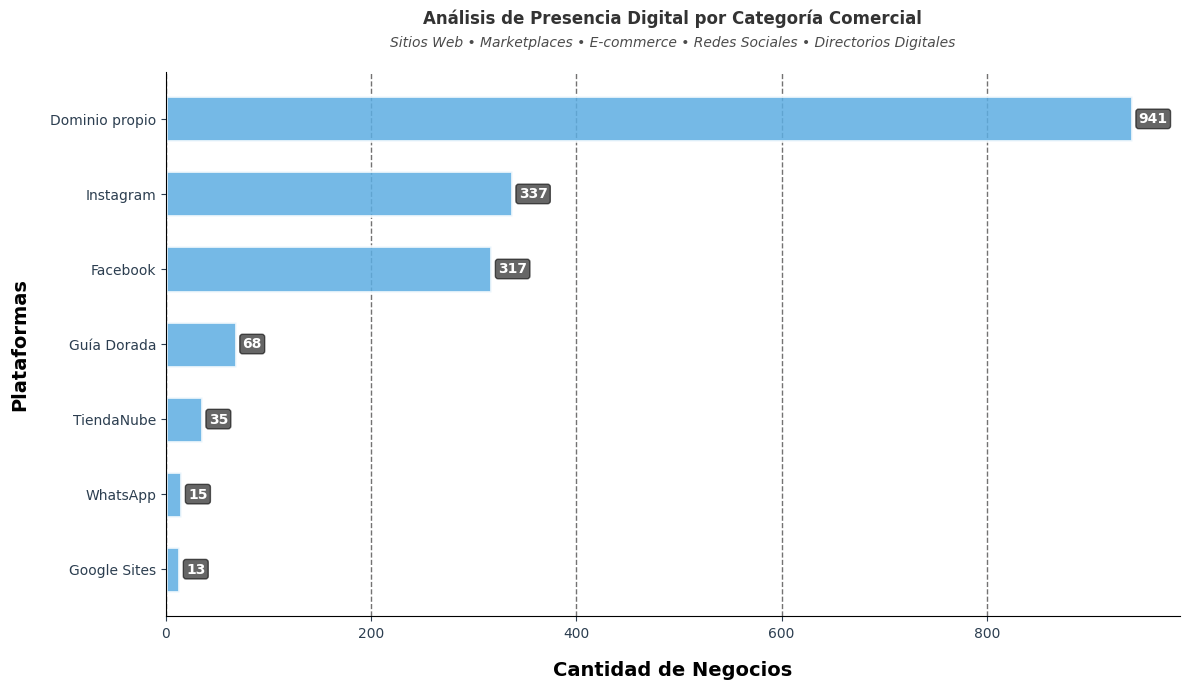

In [107]:
result_df_filtered = result_df[result_df["count"] > 10]
# Invertir orden para que mayor cantidad esté arriba
df_sorted = result_df_filtered.iloc[::-1]

fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')

# Gráfico de barras horizontales
bars = ax.barh(df_sorted.index, df_sorted["count"], color='#5DADE2', 
               edgecolor='white', linewidth=2, alpha=0.85, height=0.6)

# Títulos
ax.text(0.5, 1.08, 'Análisis de Presencia Digital por Categoría Comercial', 
        transform=ax.transAxes, fontsize=12, ha='center', va='bottom', fontweight='bold', alpha=0.8)
ax.text(0.5, 1.04, 'Sitios Web • Marketplaces • E-commerce • Redes Sociales • Directorios Digitales', 
        transform=ax.transAxes, fontsize=10, ha='center', va='bottom', alpha=0.7, style='italic')

# Etiquetas en barras
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{int(width)}', xy=(width, bar.get_y() + bar.get_height()/2), 
                xytext=(5, 0), textcoords="offset points", ha='left', va='center', 
                fontweight='bold', fontsize=10, color='white',
                bbox=dict(boxstyle="round,pad=0.2", facecolor='black', alpha=0.6))

# Configuración de ejes y grid
ax.set(xlabel="Cantidad de Negocios", ylabel="Plataformas")
ax.set_xlabel("Cantidad de Negocios", fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel("Plataformas", fontsize=14, fontweight='bold', labelpad=15)
ax.xaxis.grid(True, linestyle='--', alpha=0.9, color="#646363", linewidth=1)
ax.set_axisbelow(True)

# Limpieza de bordes y formato
for spine in ['top', 'right']: ax.spines[spine].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=10, colors='#2C3E50')
plt.tight_layout(); plt.show()

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

#### 💡 Preferencia de Plataforma Digital

La presencia digital está altamente polarizada. Comercios con **Dominio Propio** (impulsados por cadenas nacionales) lideran con: **(53,77)**, seguidos por Redes Sociales siendo las predominantes :**Instagram (19,26%) y Facebook (18,11%)** . Es notorio que otas plataformas tienen una presencia casi nula, lo que podría indicar que el tipo de negocio analizado es principalmente B2C (Business to Consumer) y enfocado en interacción visual.

</div>


In [88]:
# Calcular métricas base por ciudad
total_registros = df.groupby('city').size()
registros_incomplete = df[df['website'].str.contains('Incomplete', case=False, na=False)].groupby('city').size()

# Crear tabla resumen
resumen = pd.DataFrame({
    'total_registros': total_registros,
    'Incomplete': registros_incomplete
}).fillna(0)

# Calcular métricas derivadas
resumen['complete'] = resumen['total_registros'] - resumen['Incomplete']
resumen['complete_pct'] = (resumen['complete'] / resumen['total_registros'] * 100).round(2)
resumen['Incomplete_pct'] = (resumen['Incomplete'] / resumen['total_registros'] * 100).round(2)

# Ordenar por total de registros
resumen = resumen.sort_values('total_registros', ascending=False)
resumen

,total_registros,Incomplete,complete,complete_pct,Incomplete_pct
city,,,,,
Tandil,2409,1560,849,35.24,64.76
Olavarría,1494,997,497,33.27,66.73
Azul,1274,994,280,21.98,78.02
Benito Juárez,351,287,64,18.23,81.77
Rauch,331,271,60,18.13,81.87


In [89]:
# Promedio general de presencia web
avg_General = resumen['complete_pct'].mean().round(2)
print(f"Promedio general de presencia web: {avg_General}%")

Promedio general de presencia web: 25.37%


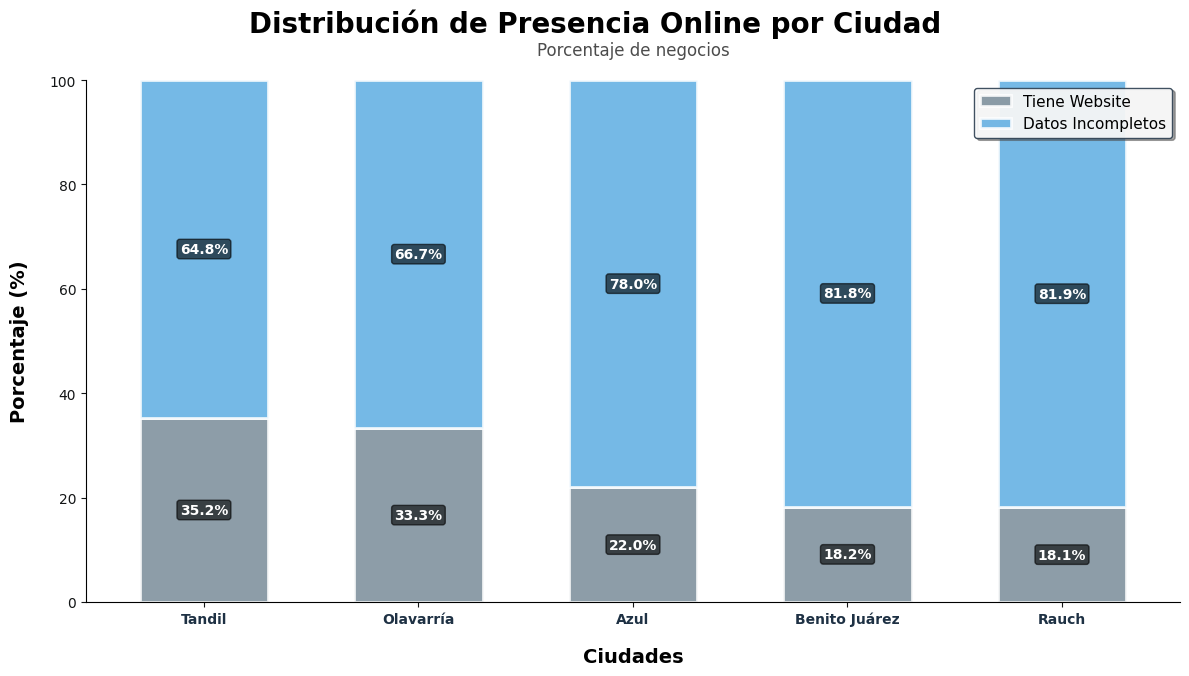

In [98]:
fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')
ax = resumen[['complete_pct', 'Incomplete_pct']].plot(
    kind='bar', stacked=True, ax=ax, color=["#798C99", '#5DADE2'], 
    width=0.6, edgecolor='white', linewidth=2, alpha=0.85
)

# Títulos y configuración
fig.suptitle('Distribución de Presencia Online por Ciudad', fontsize=20, fontweight='bold', y=0.96)
ax.text(0.5, 1.04, 'Porcentaje de negocios', transform=ax.transAxes, fontsize=12, ha='center', va='bottom', alpha=0.7)
ax.set(ylabel='Porcentaje (%)', xlabel='Ciudades', ylim=(0, 100), yticks=range(0, 101, 20))
ax.set_ylabel('Porcentaje (%)', fontsize=14, fontweight='bold', labelpad=15)
ax.set_xlabel('Ciudades', fontsize=14, fontweight='bold', labelpad=15)


# Leyenda 
ax.legend(['Tiene Website', 'Datos Incompletos'], loc='upper right', bbox_to_anchor=(1, 1), frameon=True, shadow=True, fancybox=True, fontsize=11, facecolor='white', edgecolor='#2C3E50', framealpha=0.9)

# Etiquetas en barras y limpieza
for c in ax.containers:
    ax.bar_label(c, labels=[f'{w:.1f}%' if w > 5 else '' for w in c.datavalues], 
                label_type='center', color='white', fontweight='bold', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.2", facecolor='black', alpha=0.6))
                
for spine in ['top', 'right']: ax.spines[spine].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=10, colors="#131516")
plt.xticks(rotation=45 if len(resumen) > 8 else 0, ha='right' if len(resumen) > 8 else 'center', fontweight='bold', fontsize=10, color="#1E3144")
plt.tight_layout(); plt.show()

In [97]:
# Agrupar, contar, ordenar y calcular porcentaje
category_counts = (
    df
    .groupby(['categoryName'])
    .size()
    .reset_index(name='website_count')
    .sort_values(by='website_count', ascending=False)
)

# Agregar columna con porcentaje sobre el total
category_counts['percentage'] = (
    category_counts['website_count'] / category_counts['website_count'].sum() * 100
).round(2)

category_counts

,categoryName,website_count,percentage
573,Tienda De Ropa,464,7.92
444,Tienda De Alimentación,366,6.25
90,Comercio,333,5.68
14,Agencia Inmobiliaria,180,3.07
230,Incomplete,142,2.42
...,...,...,...
579,Tienda De Ropa De Playa,1,0.02
11,Agencia De Subastas Inmobiliarias,1,0.02
7,Agencia De Publicidad,1,0.02
3,Agencia De Alquiler De Grúas,1,0.02


In [105]:
total_categorias = df['categoryName'].nunique()
print(f"Total de categorías distintas: {total_categorias}")

Total de categorías distintas: 621


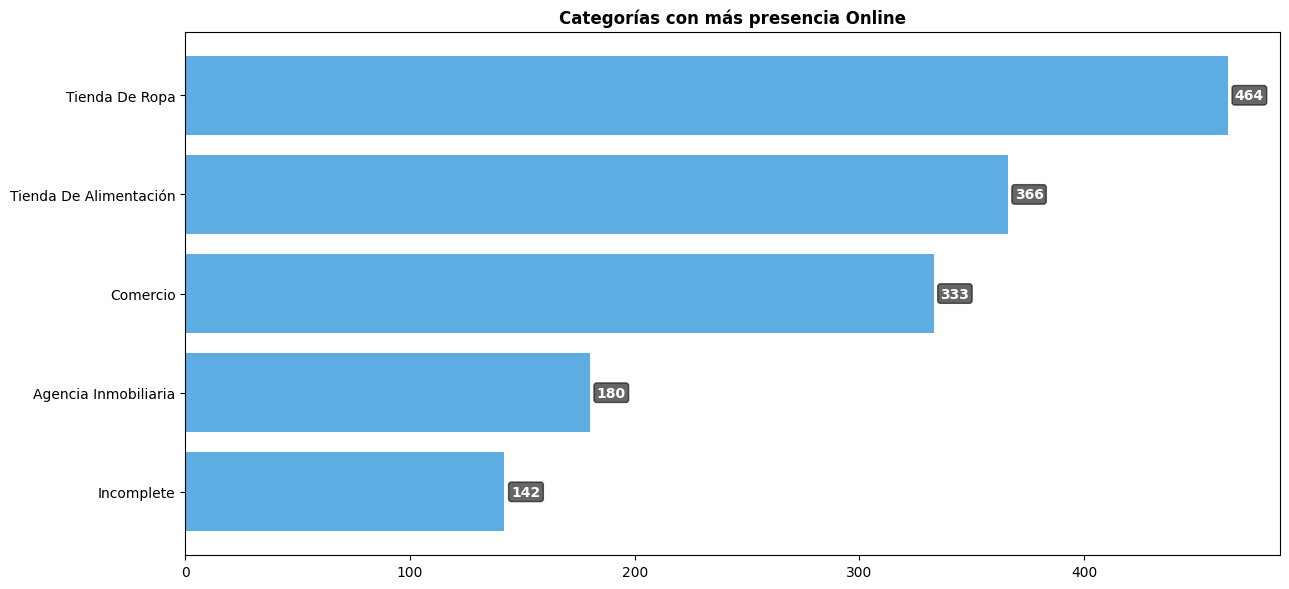

In [92]:
# Tomar solo los 5 primeros
top5 = category_counts.head(5)
# Gráfico
fig, ax = plt.subplots(figsize=(13, 6))
bars = ax.barh(
    top5['categoryName'],
    top5['website_count'],
    color="#5DADE2",
    label="Cantidad de websites"
)
# Invertir para que el mayor quede arriba
ax.invert_yaxis()
# Título
ax.set_title("Categorías con más presencia Online", fontsize=12, fontweight="bold")
# Etiquetas en las barras
for bar in bars:
    width = bar.get_width()
    ax.annotate(
        f'{int(width)}',
        xy=(width, bar.get_y() + bar.get_height()/2),
        xytext=(5, 0),
        textcoords="offset points",
        ha='left', va='center',
        fontweight='bold', fontsize=10, color='white',
        bbox=dict(boxstyle="round,pad=0.2", facecolor='black', alpha=0.6)
    )
# Ajuste de diseño
plt.tight_layout()
plt.show()


In [93]:
# Muestra cuántas veces aparece cada puntaje total en el dataset, ordenado descendentemente
df['totalScore'].value_counts().sort_values(ascending=False)

totalScore
0.0    1395
5.0    1206
4.5     424
4.7     403
4.6     396
4.8     376
4.4     313
4.3     268
4.9     214
4.0     198
4.2     151
4.1     114
3.0      70
3.8      59
3.7      58
3.9      39
1.0      38
3.5      25
2.0      21
3.6      20
3.3      19
3.4      12
2.3      11
2.5       5
3.1       4
2.9       3
2.7       3
1.8       2
1.9       2
2.8       2
3.2       2
2.4       1
1.5       1
1.3       1
2.6       1
2.1       1
1.7       1
Name: count, dtype: int64

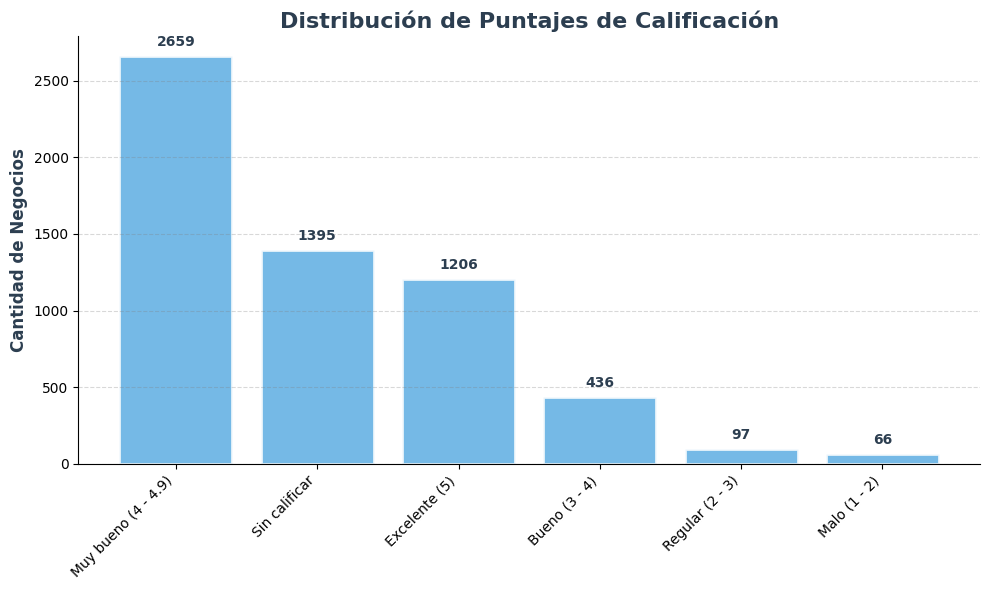

📊 Estadísticas por categorías:
🔹 Muy bueno (4 - 4.9): 2,659 negocios (45.4%)
🔹 Sin calificar: 1,395 negocios (23.8%)
🔹 Excelente (5): 1,206 negocios (20.6%)
🔹 Bueno (3 - 4): 436 negocios (7.4%)
🔹 Regular (2 - 3): 97 negocios (1.7%)
🔹 Malo (1 - 2): 66 negocios (1.1%)


In [94]:
def categorize_score(score):
    if score == 0: return "Sin calificar"
    elif score <= 2: return "Malo (1 - 2)"
    elif score <= 3: return "Regular (2 - 3)"
    elif score <= 4: return "Bueno (3 - 4)"
    elif score < 5: return "Muy bueno (4 - 4.9)"
    else: return "Excelente (5)"
df['score_category'] = df['totalScore'].apply(categorize_score)
cat_counts = df['score_category'].value_counts()
plt.figure(figsize=(10, 6), facecolor='white')
bars = plt.bar(range(len(cat_counts)), cat_counts.values, color='#5DADE2', 
               alpha=0.85, edgecolor='white', linewidth=2)
plt.title('Distribución de Puntajes de Calificación', fontsize=16, fontweight='bold', color='#2C3E50')
plt.xticks(range(len(cat_counts)), cat_counts.index, rotation=45, ha='right')
plt.ylabel('Cantidad de Negocios', fontsize=12, fontweight='bold', color='#2C3E50')

# Etiquetas arriba de barras
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom',
                fontweight='bold', fontsize=10, color='#2C3E50')

plt.grid(True, alpha=0.3, axis='y', linestyle='--', color='gray')
for spine in ['top', 'right']: plt.gca().spines[spine].set_visible(False)
plt.tight_layout(); plt.show()
print("📊 Estadísticas por categorías:")
for category, count in cat_counts.items():
    print(f"🔹 {category}: {count:,} negocios ({count/len(df)*100:.1f}%)")


<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

#### 💡 Distribución de Puntuaciones (totalScore)

La distribución de las puntuaciones está **sesgada a la izquierda (skewed left)**, lo que es común en las plataformas de rating y es una señal positiva. Esto indica que la **mayoría** de los negocios se concentra en el rango de **4.0 a 5.0**, reflejando una alta calidad percibida por el cliente.

**Punto de Cuidado:** Aunque el puntaje es alto, el análisis debe controlar la variable `reviewsCount`, ya que un alto `totalScore` basado en muy pocos comentarios puede ser menos fiable.

</div>

<div style="font-family: 'JetBrains Mono', monospace; font-size: 14px; color: #e2dbdbff; line-height: 1.6;">

## 🚀 Conclusiones y Próximos Pasos

El Análisis Exploratorio de Datos (EDA) ha revelado tendencias significativas en la digitalización y el rendimiento de los negocios.

### Hallazgos Clave

* **Dominio Sectorial y Oportunidad:** El mercado está concentrado en [Mencionar 2-3 Categorías Top], lo que exige a las empresas de estos rubros buscar ventajas competitivas, probablemente a través de la diferenciación digital.
* **Aceptación Digital:** [X]% de los negocios tienen alguna forma de presencia digital, siendo Instagram y Facebook los canales principales. Esta es una **oportunidad de consultoría** para el [Y]% de negocios que aún no están digitalizados.
* **Alta Calidad Percibida:** La distribución de `totalScore` está fuertemente sesgada hacia el extremo superior (4.0+), lo que indica una alta satisfacción general. Sin embargo, el análisis del `reviewsCount` muestra la necesidad de enfocar el análisis de calidad en negocios con un alto volumen de opiniones.
* **(Si añadiste los gráficos nuevos):** Se encontró que [Mencionar el hallazgo del Box Plot, e.g., 'la presencia de un sitio web no garantiza un puntaje más alto, pero sí lo hace más consistente.']

### Próximos Pasos (Future Work)

Para un análisis más profundo y accionable, se recomienda:

1.  **Análisis de Sentimiento:** Aplicar técnicas de NLP (Procesamiento del Lenguaje Natural) a los textos de las reseñas (`reviews`) para entender qué aspectos específicos (servicio, producto, precio) influyen positiva o negativamente en la puntuación.
2.  **Análisis Geográfico:** Si hay datos de ubicación disponibles, visualizar las puntuaciones y la digitalización en un mapa para identificar *clusters* geográficos de alta o baja performance.
3.  **Modelado Predictivo:** Utilizar las variables de presencia digital y categoría para entrenar un modelo de Machine Learning que prediga la probabilidad de que un nuevo negocio alcance una puntuación superior a 4.5.
</div>
